# Milestone - 2

# 1 - Perkenalan

Nama: `Bandoro, FTDS 013`


Objective: 
```
1. Mampu memahami konsep supervised learning dan unsupervised learning
2. Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
3. Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
4. Mampu melakukan evaluasi model
5. Mampu melakukan model tuning
6. Mampu melakukan model deployment
```

Problem: 
`Cervical cancer merupakan salah satu tipe cancer yang terjadi pada mulut rahim wanita. Setiap tahunnya, cervical cancer menimbulkan sekitar 300,000 kematian di seluruh dunia. Bagaimanapun, cancer ini merupakan salah satu tipe cancer yang paling dapat dicegah dan ditangani pada fase awal. Hal ini yang menjadi dasar bagi saya, dokter yang sekaligus data scientist di fasilitas kesehatan primer, untuk membuat suatu model machine learning yang dapat memprediksi risiko seorang perempuan mengidap cervical cancer berdasarkan riwayat dan faktor risiko yang ia miliki. Hasil prediksi model yang saya buat diharapkan dapat menjadi sumber yang adekuat bagi perempuan dengan risiko untuk memeriksakan dirinya lebih lanjut di fasilitas kesehatan yang ada`

List URL:
- URL dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv
- URL frontend: https://deployment-ml-2-frontend.herokuapp.com/
- URL backend: https://deployment-milestone-2-bandoro.herokuapp.com/cervical_cancer

# 2 - Import Libraries

In [1]:
# Berikut ini adalah library yang akan saya gunakan 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
import joblib 
import json

# 3 - Data Loading dan Initial Processing

Dataset yang saya gunakan diambil dari UC Irvine Machine Learning Repository yang berjudul 'Cervical cancer (Risk Factors) Data Set'. Data ini dikumpulkan dari random sampling pasien yang mendatangi departemen ginekologi di 'Hospital Universitario de Caracas, Venezuela' pada rentang tahun 2012-2013. Pada tiap pasien dilakukan wawancara terkait informasi demografis, riwayat kebiasaan sehari-hari, serta diambil pula riwayat rekam medis dari pemeriksaan sebelumnya. Pada tiap pasien juga dilakukan screening kanker serviks berupa pemeriksaan Hinselmann, Schiller, dan Citology, dimana jika hasil dari pemeriksaan tersebut indikatif maka pasien dapat menjalani permeriksaan Biopsy untuk memastikan diagnosisnya (source: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29).

In [2]:
# set_options untuk menampilkan seluruh kolom

pd.set_option('display.max.columns', None)

In [3]:
# loading data

data_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv')
data_raw

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


Dapat dilihat bahwa dataset yang digunakan terdiri dari 858 baris dan 36 kolom. Tiap baris mewakili informasi dari tiap pasien (858 pasien), dan tiap kolom merupakan penjabaran informasi demografis, riwayat kebiasaan sehari-hari, dan riwayat rekam medis dari tiap-tiap pasien. Berikut penjelasan dari tiap-tiap kolom: 

* Age : Umur (tahun) 
* Number of sexual partners : jumlah parner seksual (orang)
* First sexual intercourse : umur saat pertama kali melakukan hubungan seksual (tahun) 
* Num of pregnancies : jumlah kehamilan 
* Smokes : merokok atau tidak (1/0)
* Smokes (years) : lama merokok (tahun)
* Smokes (packs/year) : jumlah pack rokok yang dikonsumsi pertahunnya 
* Hormonal Contraceptives : menggunakan alat kontrasepsi hormonal atu tidak (1/0)
* Hormonal Contraceptives (years) : lama penggunaan alat kontrasepsi hormonal (tahun)
* IUD : mmenggunakan alat kontrasepsi dalam rahim (AKDR) atau tidak (1/0) 
* IUD (years) : lama penggunaan AKDR (tahun)
* STDs : mengidap sexual transmitted disease (penyakit menular seksual) atau tidak (1/0)
* STDs (number) : jumlah STD yang diderita
* STDs:condylomatosis : menderita STD condylomatosis atau tidak (1/0)
* STDs:cervical condylomatosis : menderita STD cervical condylomatosis atau tidak (1/0)
* STDs:vaginal condylomatosis : menderita STD vaginal condylomatosis atau tidak (1/0)
* STDs:vulvo-perineal condylomatosis : menderita STD vulvo-perineal condylomatosis atau tidak (1/0)
* STDs:syphilis : menderita STD sifilis atau tidak (1/0)
* STDs:pelvic inflammatory disease : menderita STD pelvic inflammatory disease atau tidak (1/0)
* STDs:genital herpes : menderita STD genital herpes atau tidak (1/0)
* STDs:molluscum contagiosum : menderita STD molluscum contagiosum atau tidak (1/0)
* STDs:AIDS : menderita STD AIDS atau tidak (1/0)
* STDs:HIV : menderita STD HIV atau tidak (1/0)
* STDs:Hepatitis B : menderita STD hepatitis B atau tidak (1/0)
* STDs:HPV : menderita STD human papiloma virus atau tidak (1/0)
* STDs: Number of diagnosis : jumlah STD yang terdiagnosis
* STDs: Time  first diagnosis : lama waktu sejak diagnosis pertama
* STDs: Time since last diagnosis : lama waktu sejak diagnosis terakhir
* Dx:Cancer : Apakah pasien memiliki riwayat terdiagnosis cancer (pada bagian tubuh manapun) atau tidak (1/0)
* Dx:CIN : Apakah pasien memiliki riwayat terdiagnosis Cervical intraepithelial neoplasia atau tidak (1/0)
* Dx:HPV : Apakah pasien memiliki riwayat terdiagnosis Human Papilloma Virus atau tidak (1/0)
* Dx : apakah pasien memiliki riwayat terdiagnosis penyakit cervix lain sebelumnya.
* Hinselmann: hasil dari tes Hinselmann yang dilakukan indikatif atau tidak (1/0)
* Schiller: hasil dari tes schiller yang dilakukan indikatif atau tidak (1/0)
* Cytology: hasil tes cytology yang dilakukan indikatif atau tidak (1/0)
* Biopsy: hasil tes biopsy yang dilakukan pada pasien indikatif atau tidak (1/0)

Menurut lembaga riset yang mengeluarkan dataset, terdapat 4 kolom yang dapat yang dapat dijadikan target pada dataset ini, 4 kolom ini merupakan kumpulan jenis uji diagnostik yang berbeda yang terdiri dari tes Hinselmann, Schiller, Citology, dan Biopsy. Namun perlu diketahui bahwa pada kasus kanker serviks hasil tes Hinselmann, Schiller, dan Citology hanyalah merupakan screening awal dari cervical cancer itu sendiri, dimana pasien yang mendapat hasil screening positif perlu menjalani biopsy untuk akhirnya dapat didiagnosa mengalami cervical cancer atau tidak. Karenanya pada kasus kali ini kolom 'Biopsy' akan saya jadikan sebagai target.

In [4]:
# membuat data_copy sebagai backup

data_raw_copy = data_raw.copy()

In [5]:
# mengamati tipe dan jumlah data

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

Diatas ini tampak bahwa terdapat 10 kolom dengan tipe data integer dan 26 kolom dengan data object, karena kolom object tersebut berisi nilai numerik, maka tipe data kolom akan saya ubah menjadi numerik pada proses selanjutnya. Secara sekilas tampak bahwa tidak ada missing values pada tiap-tiap kolom, namun seperti yang telah diamati diatas, terdapat beberapa kolom yang mengandung value '?' yang nantinya akan saya definisikan ulang sebagai missing values. 

In [6]:
# mengganti value '?' menjadi missing values

data_raw.replace('?', np.nan, inplace=True)

In [7]:
# mengubah kolom bertipe object menjadi numerik

data = data_raw.apply(pd.to_numeric)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

Dapat terlihat bahwa kolom object sudah berubah menjadi numerik, dan '?' sudah di replace sebagai missing values. Diantara 36 kolom numerik tersebut, 12 merupakan representasi true numerik, dan 24 merupakan representasi kategorik.

In [9]:
num_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']

cat_columns = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis','STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis','STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology']

print('Jumlah kolom numerik: ',len(num_columns))
print('Jumlah kolom kategorik: ',len(cat_columns)) #kolom kategorik tanpa target

Jumlah kolom numerik:  12
Jumlah kolom kategorik:  23


In [10]:
# melihat gambaran distribusi masing-masing kolom numerik

data[num_columns].describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,750.000000,741.000000,753.000000,858.000000,71.000000,71.000000
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.087413,6.140845,5.816901
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.302545,5.895024,5.755271
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,4.000000,3.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,8.000000,7.500000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000


Diatas ini dapat dilihat bahwa umur pasien yang datang untuk screening memiliki rentang antara 13 hingga 84 tahun. Rata-rata pasien memiliki 2-3 partner seksual dan rata-rata hubungan seksual pertama saat berumur 16 tahun. Jumlah penyakit menular seksual yang dimiliki pasien (STDs(number)) bervariasi antara tidak memiliki penyakit sama sekali hingga memiliki 4 penyakit menular seksual sekaligus.

# 4 - Exploratory Data Analysis (EDA)

Dilansir dari mayoclinic.org, dibawah ini merupakan faktor risiko terjadinya cervical cancer pada perempuan (link: https://www.mayoclinic.org/diseases-conditions/cervical-cancer/symptoms-causes/syc-20352501):

- Jumlah pasangan seksual: semakin banyak jumlah pasangan seksual, semakin meningkat kemungkinan seseorang mengidap HPV (Human Papiloma Virus), infeksi HPV itu sendiri dapat meningkatkan risiko terjadinya cervical cancer.
- Hubungan seksual dini: semakin dini hubungan seksual dilakukan, risiko infeksi HPV menjadi semakin tinggi, hal ini dapat meningkatkan kemungkinan seseorang mengidap cervical cancer seterusnya.
- Menderita penyakit menular seksual lainnya seperti chlamydia, gonorrhea, syphilis, dasn HIV/AIDS
- Merokok 
- Penggunaan obat-obatan pencegah keguguran tertentu seperti diethylstilbestrol (DES) dapat meningkatkan kemungkinan anak yang dikandung menderita cervical cancer dikemudian hari.

Dibawah ini saya akan melakukan visualisasi menggunakan heatmap untuk mencaritahu apakah terdapat korelasi antara faktor-faktor yang disebutkan diatas terhadap hasil 'Biopsy' pasien.

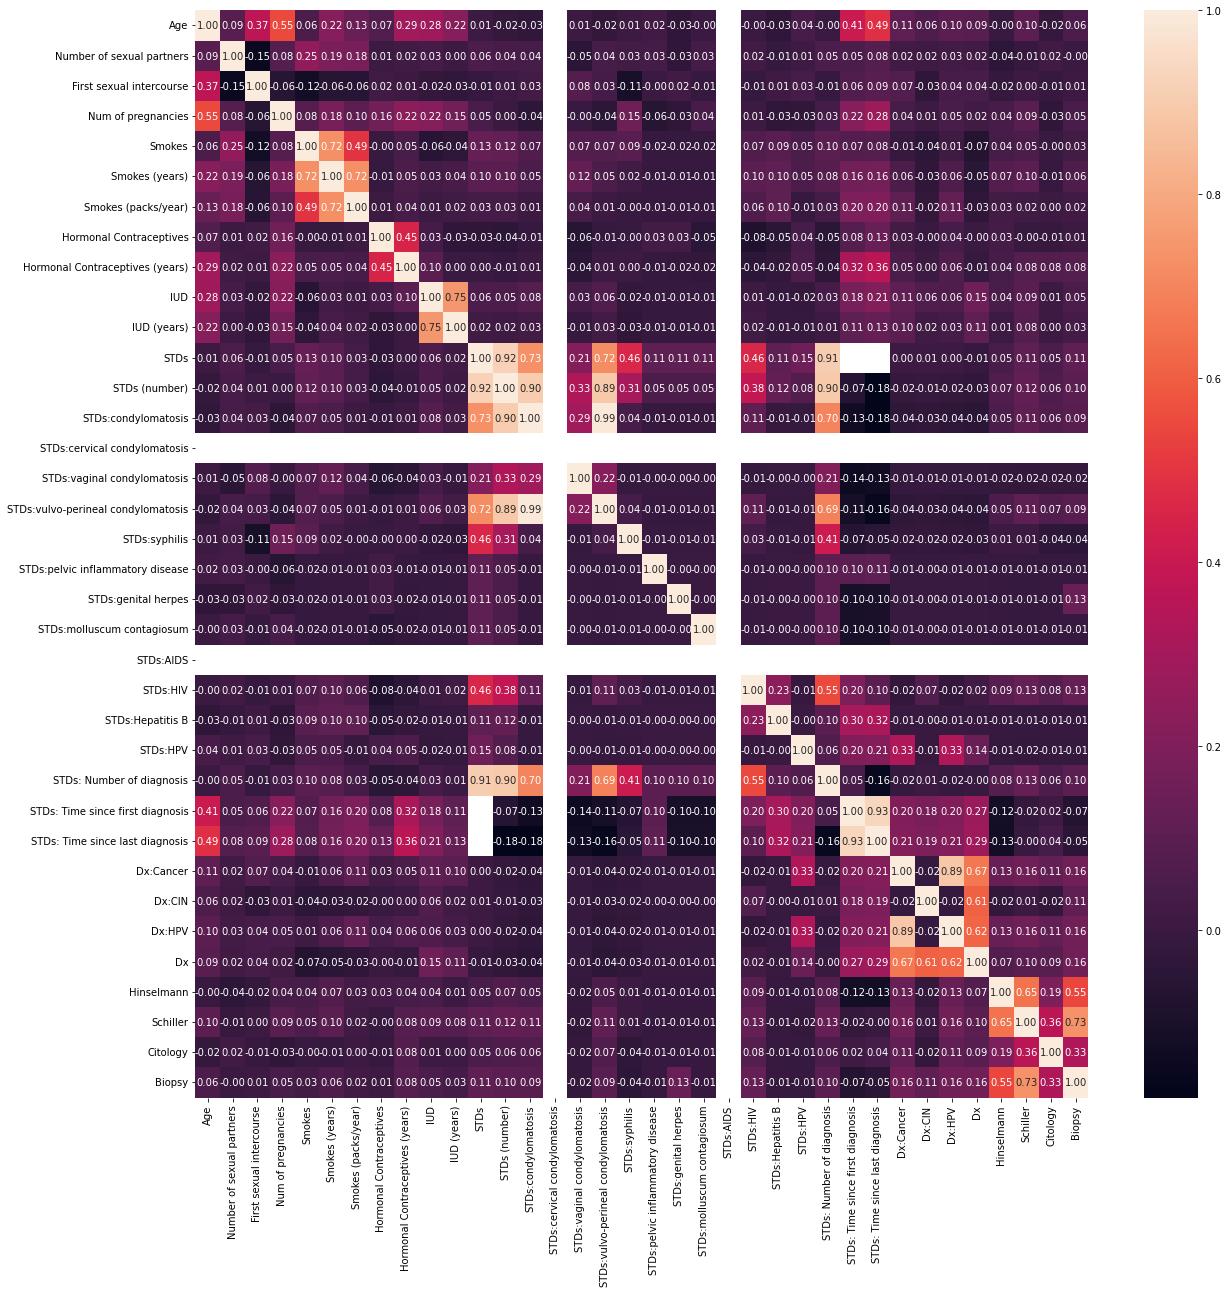

In [11]:
# menampilkan heatmap

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

Dapat dilihat, bahwa secara umum, riwayat penyakit menular seksual (STDs, STDs (number), STDs:genital herpes, STDs:HIV) memiliki korelasi yang lebih besar terhadap hasil 'Biopsy' diantara faktor risiko lainnya. Bagaimanapun, korelasi tertinggi dimiliki oleh kolom yang menunjukan hasil screening 'Hinselmann', 'Schiller', dan 'Citology'. Faktor risiko lain seperti jumlah pasangan seksual dan merokok tampak memiliki korelasi yang kecil (tidak sejalan dengan teori yang ada), namun hal ini kemungkinan besar juga dipengaruhi oleh jumlah data yang masih sedikit sehingga belum merepresentasikan karakteristik populasi sesungguhnya.

In [60]:
# Menampilkan proporsi target

print("proporsi kategori 1 ('Positive Biopsy') pada target: ", len(data[data['Biopsy'] == 1])/len(data))
print("proporsi kategori 0 ('Positive Biopsy') pada target: ", len(data[data['Biopsy'] == 0])/len(data))

proporsi kategori 1 ('Positive Biopsy') pada target:  0.0641025641025641
proporsi kategori 0 ('Positive Biopsy') pada target:  0.9358974358974359


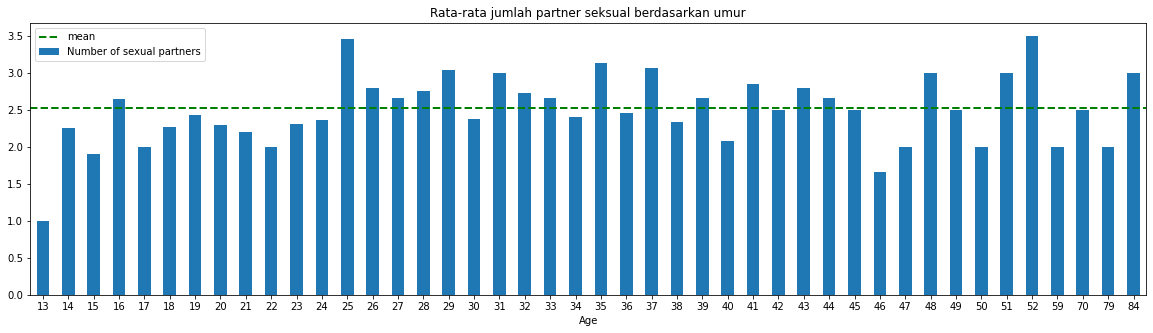

In [12]:
# melihat distribusi jumlah partner seksual berdasarkan umur

data.groupby('Age')['Number of sexual partners'].mean().plot(kind='bar', figsize= (20, 5))
plt.axhline(data['Number of sexual partners'].mean(), color= 'green', linewidth=2, linestyle='dashed', label='mean')
plt.xticks(rotation=0)
plt.title('Rata-rata jumlah partner seksual berdasarkan umur')
plt.legend()
plt.show()

Dapat dilihat bahwa jumlah sexual partner cenderung meningkat setelah umur 24 tahun, dengan rata-rata tertinggi pada perempuan berumur 25 tahun dan 52 tahun.

In [13]:
# mengamati perbedaan jumlah partner seksual antara pasien yang mendapat hasil pemeriksaan positif dan negatif

data.groupby('Number of sexual partners')[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].sum()

,Hinselmann,Schiller,Citology,Biopsy
Number of sexual partners,,,,
1.0,10,17,9,13
2.0,10,22,13,17
3.0,12,21,12,13
4.0,1,9,4,6
5.0,1,3,5,4
6.0,0,1,1,1
7.0,0,0,0,0
8.0,0,0,0,0
9.0,0,0,0,0


Dapat dilihat diatas ini, hasil tes positif paling banyak terjadi pada partner seksual yang memiliki 2 dan 3 pasangan, dan makin menurun setelahnya, bagaimanapun hasil ini tidak cukup representatif karena pasien dengan jumlah pasangan seksual >3 sangat sedikit jumlahnya (akan saya tunjukkan dibawah ini).

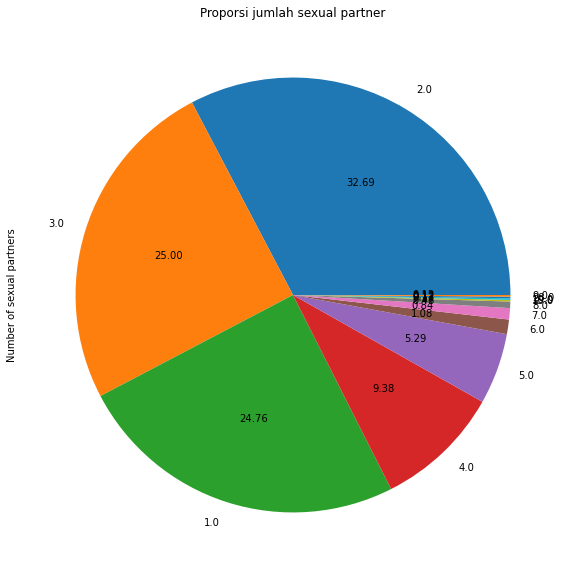

In [14]:
# menampilkan piechart proporsi jumlah partner seksual pasien

data['Number of sexual partners'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')
plt.title('Proporsi jumlah sexual partner')
plt.show()

Dapat dilihat diatas ini bahwa proporsi pasien dengan jumlah partner seksual 1, 2, dan 3 mendominasi sebaran data.

# 5 - Data Preprocessing

In [15]:
# Mengambil 10 sampel data sebagai data inference

data_inf = data.sample(10, random_state=10)
data_inf

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
693,18,2.0,17.0,NaN,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,1,0,1
377,20,2.0,14.0,4.0,1.0,3.0,3.00,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,1
539,18,1.0,16.0,1.0,1.0,2.0,0.05,0.0,0.00,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0,0,0,0,1,1,0,1
358,21,1.0,17.0,1.0,0.0,0.0,0.00,1.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
387,22,2.0,18.0,1.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
537,24,4.0,14.0,2.0,1.0,2.0,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
721,34,1.0,15.0,4.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
396,18,3.0,14.0,1.0,1.0,3.0,0.45,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
661,23,5.0,16.0,1.0,0.0,0.0,0.00,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
163,28,5.0,14.0,4.0,0.0,0.0,0.00,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,1


In [16]:
# Mengeluarkan baris data inference pada dataset utama

data_train_test = data.drop(data_inf.index)
data_train_test

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [17]:
# Reset index pada dataframe utama dan inference untuk meminimalisir kemungkinan error akibat pengambilan data inference

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## Splitting dataset

In [18]:
# memisahkan features dan target

y = data_train_test['Biopsy']
X = data_train_test.drop(columns='Biopsy', axis=1)

In [19]:
# Melakukan train test split (proporsi test 20%)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

print('X_Train shape: ', X_train.shape)
print('X_Test shape: ', X_test.shape)
print('y_Train shape: ', y_train.shape)
print('y_Test shape: ', y_test.shape)

X_Train shape:  (678, 35)
X_Test shape:  (170, 35)
y_Train shape:  (678,)
y_Test shape:  (170,)


## Handling outliers

In [20]:
# menampilkan kolom dengan value true numerik

print(num_columns)
print('Jumlah numerical columns: ', len(num_columns))


['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
Jumlah numerical columns:  12


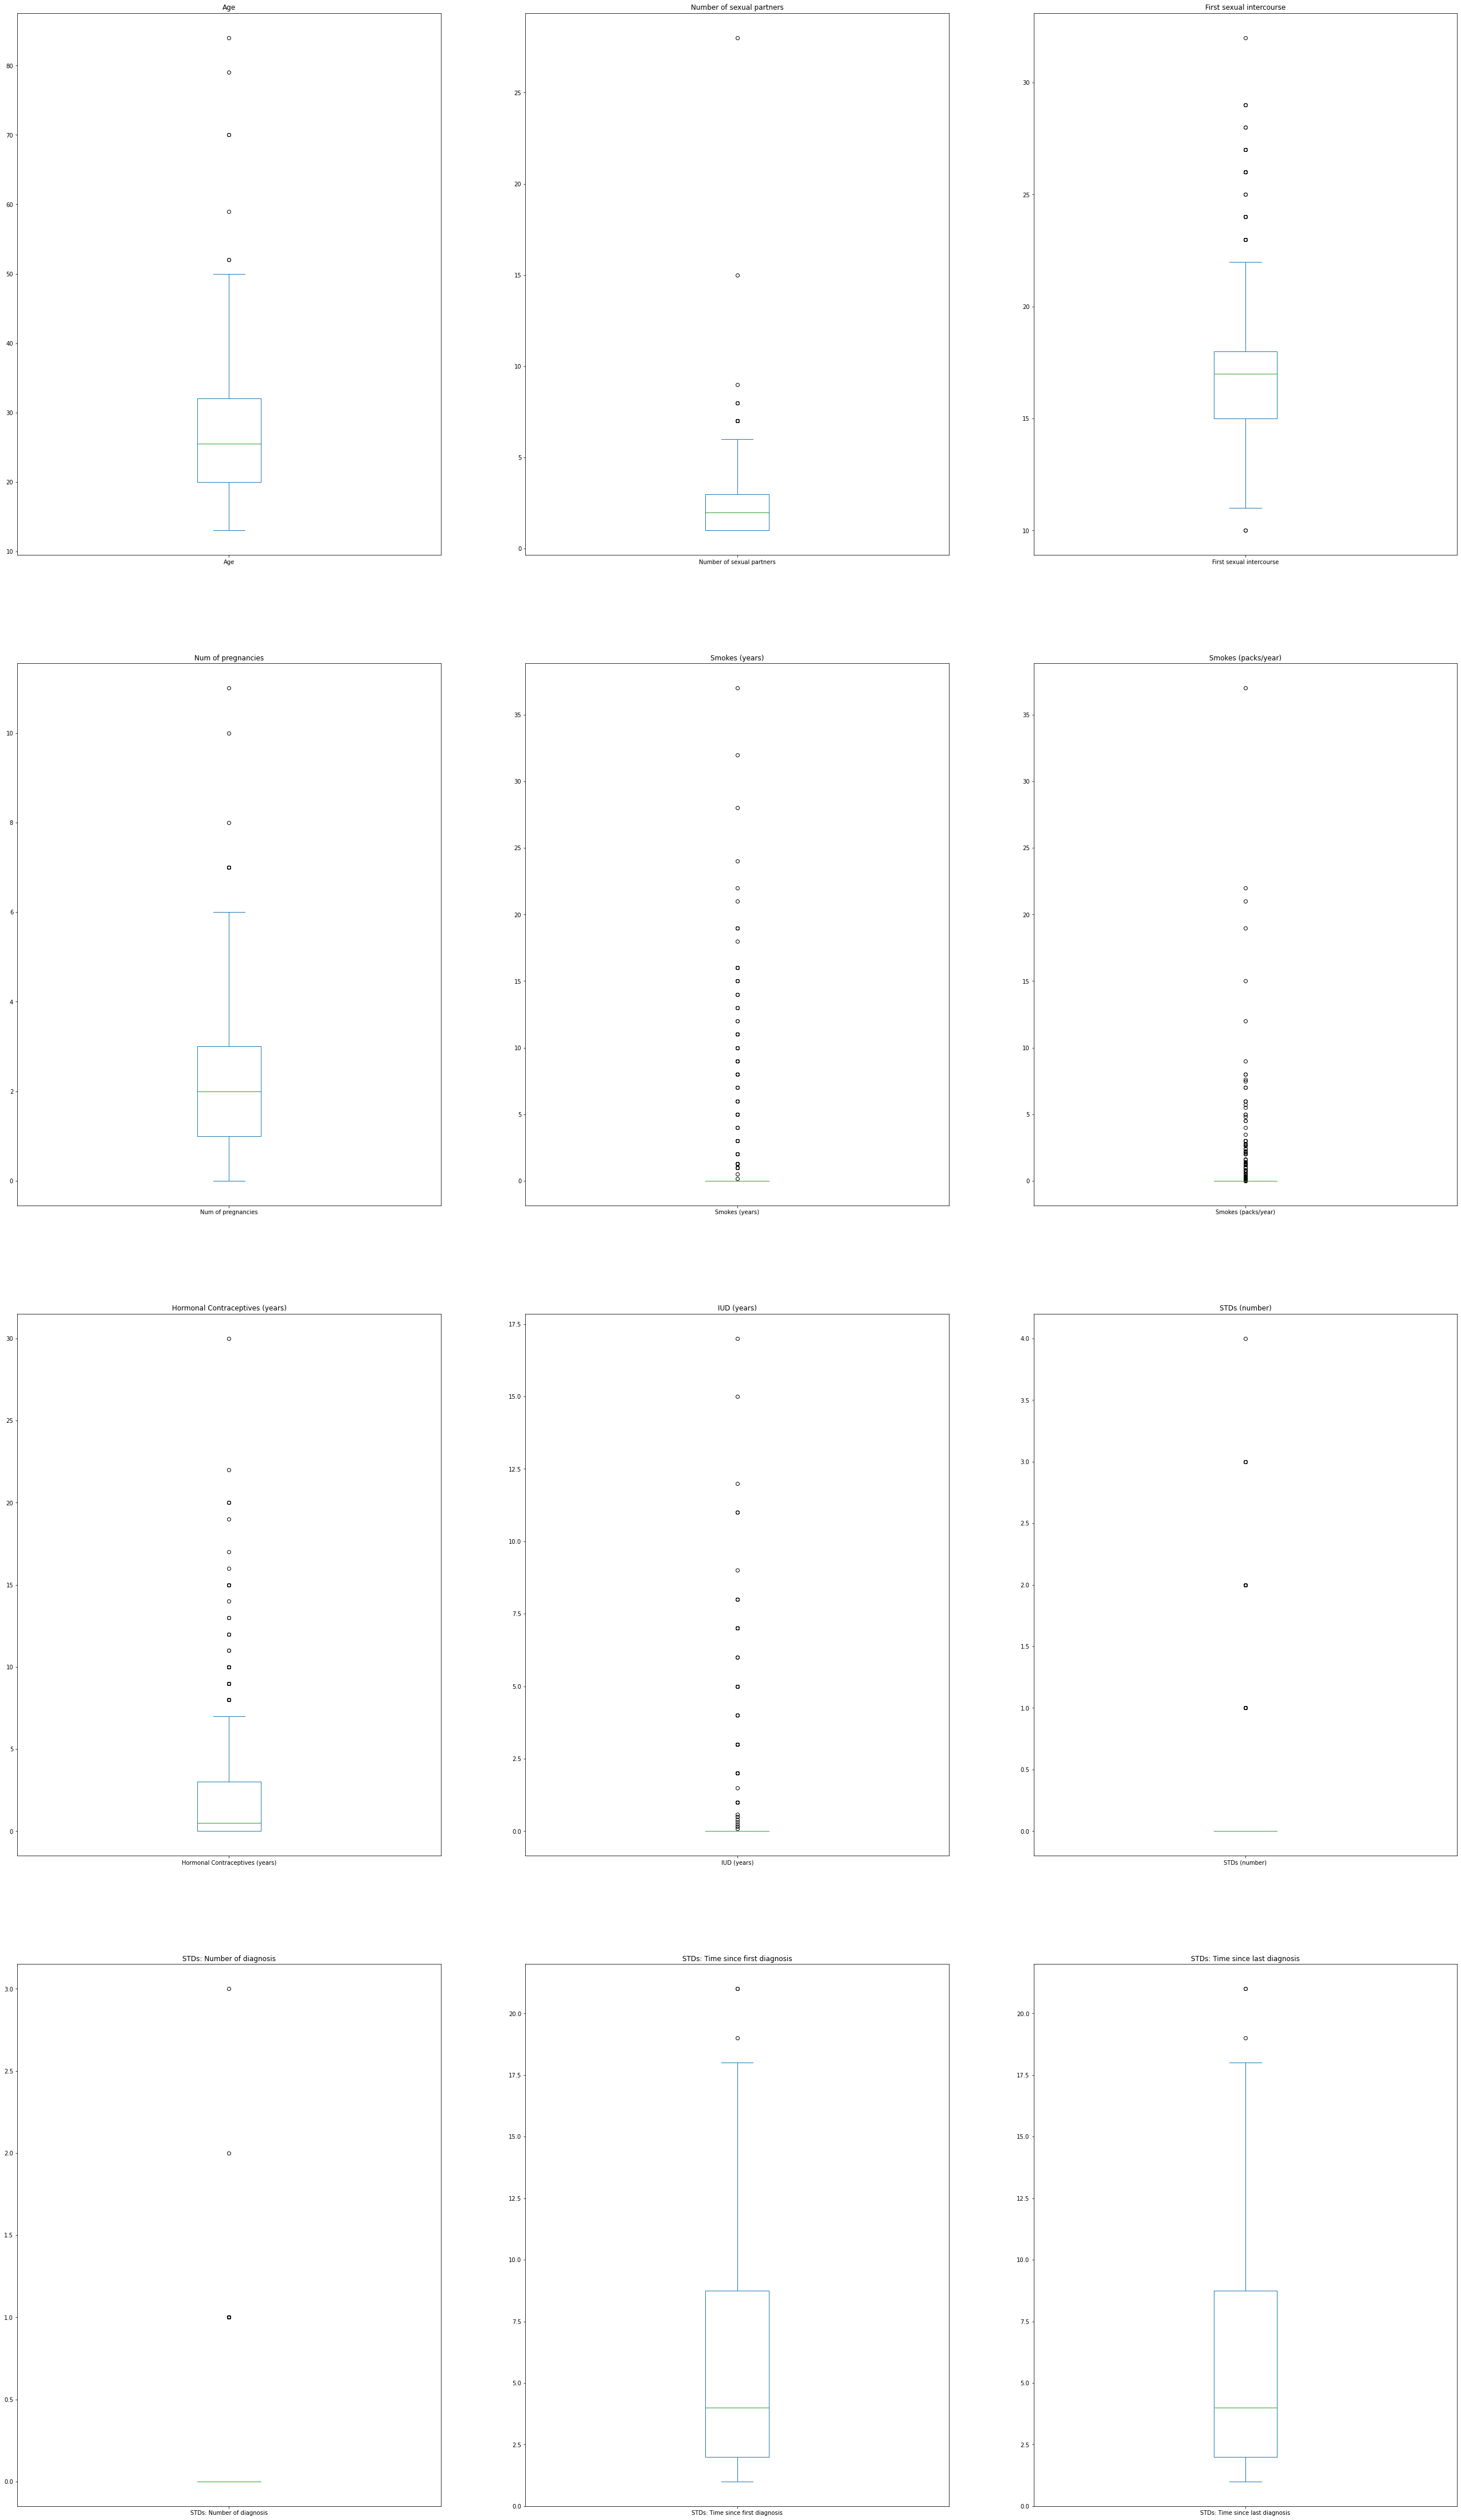

In [21]:
# Mengamati outliers pada kolom numerik menggunakan boxplot

k = 0

figs, axs = plt.subplots(nrows=4, ncols=3,figsize=(45,80))

for i in range(4):
    for j in range(3):
        X_train[num_columns[k]].plot(kind='box', title= num_columns[k], ax=axs[i,j]) #num_columns telah di definisikan pada proses data loading diatas
        k += 1

plt.show()

Diatas ini dapat dilihat bahwa seluruh kolom mengandung outliers. Bagaimanapun sebagian besar outliers tersebut merupakan nilai yang masih masuk akal dari segi medis (merupakan natural errors). Saya hanya akan menghandling outliers yang bernilai jauh lebih besar dari sebaran data dan dapat mengganggu proses scaling nantinya, diantaranya adalah outliers pada kolom 'Number of sexual partners' dan 'Num of pregnancies'. Saya akan mencari jumlah persentase outliers pada kolom tersebut sebelum menentukan metode handling yang digunakan.

In [22]:
# Mendefinisikan fungsi untuk menemukan skewness

def find_skewness(df, numeric_columns):
    for column in numeric_columns:
        print(f'Skewness {column}: ', df[column].skew())

# Mendefinisikan fungsi batas outliers untuk kolom beristribusi normal dan skewed

def find_normal_boundaries(df, column):
    upper_bound = df[column].mean() + 3 * df[column].std()
    lower_bound = df[column].mean() - 3 * df[column].std()
    return upper_bound, lower_bound

def find_skewed_boundaries(df, column, distance):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - (IQR * distance)
    upper_bound = df[column].quantile(0.75) + (IQR * distance)
    return upper_bound, lower_bound

# Mendefinisikan fungsi untuk menemukan persentase outliers berdasarkan distribusinya

def find_outliers_percentage(df, numeric_columns):
    for column in numeric_columns:
        if df[column].skew() <= 0.5 and df[column].skew() >= -0.5:
            upper_bound, lower_bound = find_normal_boundaries(df, column)
        elif df[column].skew() > 1 or df[column].skew() < -1:
            upper_bound, lower_bound = find_skewed_boundaries(df, column, distance=3) #distance untuk extremely skewed
        else:
            upper_bound, lower_bound = find_skewed_boundaries(df, column, distance=1.5) #distance untuk moderate skewed
        print(f"outliers {column}: ", len( df[(df[column] > upper_bound) | (df[column] < lower_bound)] ) *100 / len(df) , '%')

In [23]:
find_outliers_percentage(X_train, ['Number of sexual partners', 'Num of pregnancies'])

outliers Number of sexual partners:  0.2949852507374631 %
outliers Num of pregnancies:  0.2949852507374631 %


Karena outliers berjumlah sangat sedikit (< 1%), maka saya akan melakukan trimming.

In [24]:
# Mendefinisikan fungsi untuk trimming outliers

def trimming_outliers(X_df, y_df, numeric_columns):
    X_df = X_df.copy()
    y_df = y_df.copy()
    for column in numeric_columns:
        if X_df[column].skew() <= 0.5 and X_df[column].skew() >= -0.5:
            upper_bound, lower_bound = find_normal_boundaries(X_df, column)
        elif X_df[column].skew() > 1 or X_df[column].skew() < -1:
            upper_bound, lower_bound = find_skewed_boundaries(X_df, column, distance=3)
        else:
            upper_bound, lower_bound = find_skewed_boundaries(X_df, column, distance=1.5)
        outliers_df = X_df[ (X_df[column] > upper_bound) | (X_df[column] < lower_bound) ]
        X_df.drop(outliers_df.index, axis=0, inplace = True)
        y_df.drop(outliers_df.index, axis=0, inplace = True)
    return X_df, y_df

In [25]:
# trimming outliers pada X_train

X_train_trimmed, y_train_trimmed = trimming_outliers(X_train, y_train, ['Number of sexual partners', 'Num of pregnancies'])

print('X_train_trimmed shape: ', X_train_trimmed.shape)
print('y_train_trimmed shape: ', y_train_trimmed.shape)

X_train_trimmed shape:  (674, 35)
y_train_trimmed shape:  (674,)


## Handling missing values

In [26]:
# Mengamati missing values

print('Missing Values X_train:', X_train_trimmed.isnull().sum().sum())
print('Missing Values X_test:', X_test.isnull().sum().sum())
print('Missing Values y_train:', y_train_trimmed.isnull().sum())
print('Missing Values y_test:', y_test.isnull().sum())

Missing Values X_train: 2857
Missing Values X_test: 733
Missing Values y_train: 0
Missing Values y_test: 0


In [27]:
# Mengamati kolom dengan missing values pada X_train

print('Missing Values X_train:', X_train_trimmed.isnull().sum())

Missing Values X_train: Age                                     0
Number of sexual partners              20
First sexual intercourse                6
Num of pregnancies                     43
Smokes                                 10
Smokes (years)                         10
Smokes (packs/year)                    10
Hormonal Contraceptives                85
Hormonal Contraceptives (years)        85
IUD                                    92
IUD (years)                            92
STDs                                   83
STDs (number)                          83
STDs:condylomatosis                    83
STDs:cervical condylomatosis           83
STDs:vaginal condylomatosis            83
STDs:vulvo-perineal condylomatosis     83
STDs:syphilis                          83
STDs:pelvic inflammatory disease       83
STDs:genital herpes                    83
STDs:molluscum contagiosum             83
STDs:AIDS                              83
STDs:HIV                               83
STDs:Hepat

In [28]:
# Mengamati kolom dengan missing values pada X_test

print('Missing Values X_test:', X_test.isnull().sum())

Missing Values X_test: Age                                     0
Number of sexual partners               6
First sexual intercourse                1
Num of pregnancies                     12
Smokes                                  2
Smokes (years)                          2
Smokes (packs/year)                     2
Hormonal Contraceptives                22
Hormonal Contraceptives (years)        22
IUD                                    24
IUD (years)                            24
STDs                                   22
STDs (number)                          22
STDs:condylomatosis                    22
STDs:cervical condylomatosis           22
STDs:vaginal condylomatosis            22
STDs:vulvo-perineal condylomatosis     22
STDs:syphilis                          22
STDs:pelvic inflammatory disease       22
STDs:genital herpes                    22
STDs:molluscum contagiosum             22
STDs:AIDS                              22
STDs:HIV                               22
STDs:Hepati

Karena jumlah missing values cukup banyak, maka saya akan melakukan inputasi berdasarkan central tendency. Untuk kolom numerik akan saya isi berdasarkan mean/median, kolom kategorik akan saya inputasi berdasarkan modus.

In [29]:
# Melihat skewness dari kolom X_train untuk menentukan inputasi menggunakan mean atau median

find_skewness(X_train_trimmed, num_columns)

Skewness Age:  1.076208983177612
Skewness Number of sexual partners:  1.2888512991364898
Skewness First sexual intercourse:  1.5846648314402292
Skewness Num of pregnancies:  1.1280692522607143
Skewness Smokes (years):  4.44032501922573
Skewness Smokes (packs/year):  9.357720816196863
Skewness Hormonal Contraceptives (years):  2.561573566638167
Skewness IUD (years):  5.059335244680263
Skewness STDs (number):  3.5416043122038885
Skewness STDs: Number of diagnosis:  4.030490485292063
Skewness STDs: Time since first diagnosis:  1.1212750387067925
Skewness STDs: Time since last diagnosis:  1.1193765514577954


Karena seluruh kolom numerik tidak berdistribusi normal, maka inputasi missing values akan menggunakan median. Untuk missing values pada kolom numerik saya akan menggunakan modus. Inputasi akan saya lakukan menggunakan simple imputer.

In [30]:
# Fitting simple imputer terhadap kolom pilihan

imp_num = SimpleImputer(missing_values =np.nan, strategy="median")
imp_cat = SimpleImputer(missing_values = np.nan, strategy="most_frequent")

imp_num.fit(X_train_trimmed[num_columns])
imp_cat.fit(X_train_trimmed[cat_columns])

SimpleImputer(strategy='most_frequent')

In [31]:
# mendefinisikan fungsi simple_imputer yang akan memproses kolom numerik dan kategorik

def simple_imputer(X_df, numeric_columns = num_columns, categoric_columns = cat_columns):
    X_df = X_df.copy()
    X_df_num = pd.DataFrame(imp_num.transform(X_df[numeric_columns]), columns=numeric_columns)
    X_df_cat = pd.DataFrame(imp_cat.transform(X_df[categoric_columns]), columns=categoric_columns)
    X_df_imputted = pd.concat([X_df_num, X_df_cat], axis=1)
    return X_df_imputted

In [32]:
# Meng-inpute missing values pada X_train

X_train_cleaned =  simple_imputer(X_train_trimmed)
X_train_cleaned

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,36.0,6.0,15.0,4.0,16.0,1.60,5.00,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,2.0,18.0,3.0,0.0,0.00,5.00,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.0,3.0,20.0,2.0,0.0,0.00,1.00,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32.0,4.0,17.0,2.0,0.0,0.00,0.16,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36.0,2.0,20.0,3.0,0.0,0.00,2.00,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,24.0,4.0,17.0,1.0,9.0,2.25,1.00,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
670,22.0,2.0,19.0,1.0,0.0,0.00,0.50,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
671,24.0,3.0,19.0,1.0,0.0,0.00,2.00,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,31.0,3.0,16.0,4.0,10.0,1.00,0.00,0.0,0.0,0.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Meng-inpute missing values pada X_test

X_test_cleaned =  simple_imputer(X_test)
X_test_cleaned

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,25.0,2.0,14.0,3.0,5.0,0.4,7.00,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.0,3.0,13.0,4.0,0.0,0.0,0.00,0.0,2.0,1.0,6.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31.0,3.0,19.0,1.0,0.0,0.0,0.08,8.0,0.0,0.0,4.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,15.0,4.0,14.0,1.0,1.0,0.1,0.08,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17.0,2.0,13.0,2.0,0.0,0.0,0.00,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,16.0,3.0,14.0,1.0,0.0,0.0,0.50,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
166,18.0,2.0,15.0,2.0,0.0,0.0,1.00,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,29.0,4.0,16.0,1.0,9.0,9.0,0.00,0.0,0.0,0.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,35.0,3.0,21.0,5.0,0.0,0.0,0.00,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# reset index pada y_train dan y_test agar sesuai dengan X_train_cleaned dan X_test_cleaned

y_train_trimmed.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [35]:
# Menserasikan nama variabel train dan test pasca cleaning untuk memudahkan pemanggilan variabel kedepannya

X_train_cleaned
X_test_cleaned
y_train_cleaned = y_train_trimmed
y_test_cleaned = y_test

In [36]:
# Memeriksa apakah missing values sudah hilang

print('Missing Values X_train:', X_train_cleaned.isnull().sum().sum())
print('Missing Values X_test:', X_test_cleaned.isnull().sum().sum())
print('Missing Values y_train:', y_train_cleaned.isnull().sum())
print('Missing Values y_test:', y_test_cleaned.isnull().sum())

Missing Values X_train: 0
Missing Values X_test: 0
Missing Values y_train: 0
Missing Values y_test: 0


Missing values sudah tidak ada pada data train dan test.

## Feature selection

In [37]:
# Mencari korelasi kolom train terhadap target 

X_train_correlation = pd.concat([y_train_cleaned, X_train_cleaned], axis=1).corr()['Biopsy'].sort_values().reset_index()
X_train_correlation

,index,Biopsy
0,STDs:syphilis,-0.038116
1,STDs:vaginal condylomatosis,-0.018887
2,STDs:HPV,-0.013335
3,Number of sexual partners,-0.009909
4,STDs:Hepatitis B,-0.009422
5,STDs:molluscum contagiosum,-0.009422
6,STDs:pelvic inflammatory disease,-0.009422
7,Smokes,-0.002458
8,Num of pregnancies,0.014833
9,First sexual intercourse,0.017994


Batas korelasi yang akan saya gunakan untuk menentukan pemilihan features adalah > 0.05 atau < - 0.05 , kolom yang memiliki korelasi diluar batas tersebut tidak akan saya pilih sebagai features.

In [38]:
# mendefinisikan features pilihan

num_features = ['IUD (years)', 'STDs (number)', 'Age', 'Hormonal Contraceptives (years)']

cat_features = ['STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:HIV', 'STDs', 'IUD', 'Dx:CIN', 'STDs:genital herpes', 'Dx:Cancer', 'Dx:HPV', 'Dx', 'Citology', 'Hinselmann', 'Schiller']

print('Jumlah features numerik: ',len(num_features))
print('Jumlah features kategorik: ',len(cat_features))

Jumlah features numerik:  4
Jumlah features kategorik:  13


Total features pilihan = 17 features

In [39]:
# mendefinisikan variabel baru berdasarkan features yang dipilih

X_train_final = X_train_cleaned[num_features+cat_features]
X_test_final = X_test_cleaned[num_features+cat_features]
y_train_final = y_train_cleaned
y_test_final = y_test_cleaned

## Scaling data

Karena sebagian besar kolom memiliki distribusi skewed dan mengandung banyak outliers, maka saya akan melakukan normalisasi menggunakan MinMaxScaler.

In [40]:
# fitting min max scaler pada X_train

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(X_train_final)

X_train_scaled_temporary = min_max_scaler.transform(X_train_final)
X_train_scaled_temporary

array([[0.        , 0.        , 0.34848485, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.21212121, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.27272727, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.12121212, ..., 0.        , 0.        ,
        0.        ]])

Pada tahap ini saya hanya akan melakukan fitting dan transform min_max_scaler pada X_train. X_train yang sudah di scaled disini juga hanya akan berlaku sementara guna mencaritahu n_components optimal pada PCA yang akan saya lakukan pada proses selajutnya. Proses scaling dan PCA yang sebenarnya akan saya lakukan menggunakan pipeline pada bagian model training.

## Mengetahui nilai n_components optimal untuk reduksi dimensi

In [41]:
#melihat bentuk data

X_train_scaled_temporary.shape

(674, 17)

Dapat dilihat bahwa features yang dimiliki saat ini terdiri dari 17 buah variabel berbeda, jumlah variabel ini akan saya reduksi menggunakan PCA sehingga data bisa terkompres menjadi bentuk yang lebih mudah untuk diproses tanpa mengurangi informasi esensial yang dimiliki.

In [42]:
# mendefinisikan PCA

pca = PCA()
pca.fit(X_train_scaled_temporary)

PCA()

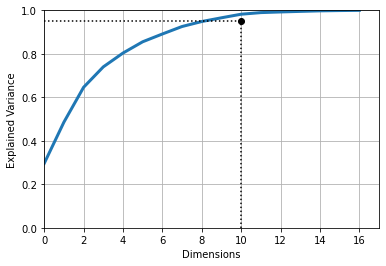

In [43]:
# Mencari n dimension yang menjelaskan 95% variance

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 17, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

Terlihat bahwa 95% variansi pada dataset awal dapat dijelakan hanya dengan menggunakan 10 dimensi hasil PCA (dimensi dataset awal = 17).

Untuk selanjutnya proses scaling dan dimentionality reduction akan saya gabungkan dalam pipeline yang akan saya buat pada bagian model training dan evaluation.

# 6 - Model definition

Karena prediksi yang akan dilakukan merupakan klasifikasi, maka model yang akan saya gunakan merupakan model bertipe classifier, diantaranya adalah logistic regression, support vector machine classifier, KNearest Neighbors, random forest, dan adaboost classifier.

In [44]:
# Mendefinisikan model baseline 

model_lr = LogisticRegression()
model_svm = SVC()
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier()
model_ab = AdaBoostClassifier()

# 7 - Model training and evaluation

Saya akan melakukan training model dan mengevaluasi hyperparameter terbaik secara bersamaan. Proses preprocessing (scaling dan dimentionality reduction) akan saya gabungkan dengan proses training model dalam satu pipeline yang sama.

Metrik evaluasi yang saya pilih dalam mengevaluasi performa model pada data train adalah roc-auc (untuk mengamati performa model secara umum/ tanpa penentuan treshold klasifikasi), saya akan memilih model baseline terbaik berdasarkan hasil cross validation. Setelah melakukan hyperparameter tuning pada model baseline terbaik, saya akan mengevaluasi kembali model tersebut menggunakan classification report untuk memilih model dengan f1 dan recall score tertinggi (recall score yang tinggi menjadi hal yang penting pada model yang memiliki kegunaan untuk screening kesehatan yang dalam kasus ini adalah screening cervical cancer).

In [45]:
# Mendefinisikan pipeline

pipe_lr = Pipeline([
    ('min_max_scaler_lr', MinMaxScaler()),
    ('PCA_lr', PCA(n_components=10)),
    ('model_lr', LogisticRegression())
])

pipe_svm = Pipeline([
    ('min_max_scaler_svm', MinMaxScaler()),
    ('PCA_svm', PCA(n_components=10)),
    ('model_svm', SVC())
])

pipe_knn = Pipeline([
    ('min_max_scaler_knn', MinMaxScaler()),
    ('PCA_knn', PCA(n_components=10)),
    ('model_knn', KNeighborsClassifier())
])

pipe_rf = Pipeline([
    ('min_max_scaler_rf', MinMaxScaler()),
    ('PCA_rf', PCA(n_components=10)),
    ('model_rf', RandomForestClassifier())
])

pipe_ab = Pipeline([
    ('min_max_scaler_ab', MinMaxScaler()),
    ('PCA_ab', PCA(n_components=10)),
    ('model_ab', AdaBoostClassifier())
])

# membuat list berisi pipelines

pipelines = [pipe_lr, pipe_svm, pipe_knn, pipe_rf, pipe_ab]



In [46]:
# Cross validation baseline model

models = ['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','AdaBoostClassifier']
cross_val_mean = []
cross_val_std = []

for pipe in pipelines:
    scores = cross_val_score(pipe, X_train_final, y_train_final, cv=5, scoring='roc_auc')
    cross_val_mean.append(scores.mean())
    cross_val_std.append(scores.std())

cross_val_df = pd.DataFrame({'models': models, 'cross_val_mean':cross_val_mean, 'cross_val_std':cross_val_std})
cross_val_df

,models,cross_val_mean,cross_val_std
0,LogisticRegression,0.952677,0.045972
1,SVC,0.962649,0.014586
2,KNeighborsClassifier,0.952774,0.031346
3,RandomForestClassifier,0.953582,0.033014
4,AdaBoostClassifier,0.880260,0.063959


Diatas ini terlihat bahwa SVC memiliki performa terbaik daripada baseline model yang ada karena memiliki ROC-AUC score tertinggi dengan standar deviasi yang cukup rendah, sekarang saya akan mencoba melakukan hyperparameter tuning terhadap model tersebut.

## Hyperparameter tuning model dengan performa terbaik (Support Vector Machine)

In [47]:
# Hyperparameter tuning SVM menggunakan Grid search cv

param_grid_svm = {'model_svm__C': np.logspace(-3, 2, 6), 'model_svm__gamma': np.logspace(-3, 2, 6), 'model_svm__kernel': ['linear', 'poly', 'rbf'] }
grid_search_svm = GridSearchCV(pipe_svm, param_grid= param_grid_svm, scoring='f1', cv=5, return_train_score=True)
grid_search_svm.fit(X_train_final, y_train_final)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('min_max_scaler_svm', MinMaxScaler()),
                                       ('PCA_svm', PCA(n_components=10)),
                                       ('model_svm', SVC())]),
             param_grid={'model_svm__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'model_svm__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'model_svm__kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='f1')

In [48]:
# Mencari parameter terbaik dari hasil grid search model svm

grid_search_svm.best_params_

{'model_svm__C': 0.1, 'model_svm__gamma': 0.001, 'model_svm__kernel': 'linear'}

Dapat dilihat bahwa hyperparameter terbaik SVM berada pada C:1.0, gamma:0.001, dengan kernel linear. C merupakan parameter yang menandakan derajat optimisasi dari SVM. Gamma merupakan parameter yang menentukan radius yang penentuan kelompok yang sama pada svm. Dan kernel adalah sebuah fungsi yang membantu transformasi sebaran data awal pada dimensi yang lebih tinggi, distribusi baru yang terbentuk dari proses transformasi ini nantinya akan memungkinkan pemilihan hyperplane yang sesuai.

In [49]:
# melihat f1 score dari SVM dengan hyperparameter terbaik

grid_search_svm.best_score_

0.7501135190918473

In [50]:
# mendefinisikan pipeline svm terbaik dalam variabel baru

pipe_svm_best = grid_search_svm.best_estimator_

In [51]:
# melihat hasil classification report dari svm terbaik terhadap train dan test

pipe_svm_best.fit(X_train_final, y_train_final)

y_train_pred = pipe_svm_best.predict(X_train_final)
y_test_pred = pipe_svm_best.predict(X_test_final)

print(classification_report(y_train_final, y_train_pred))
print(classification_report(y_test_final, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       636
           1       0.67      0.89      0.76        38

    accuracy                           0.97       674
   macro avg       0.83      0.93      0.87       674
weighted avg       0.98      0.97      0.97       674

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       157
           1       0.60      0.92      0.73        13

    accuracy                           0.95       170
   macro avg       0.80      0.94      0.85       170
weighted avg       0.96      0.95      0.95       170



Dapat dilihat bahwa model SVM dengan hyperparameter {'model_svm__C': 0.1, 'model_svm__gamma': 0.001, 'model_svm__kernel': 'linear'}, memiliki performa yang cukup baik pada data train maupun test (treshold f1 score yang dapat diterima adalah >0.5, https://stephenallwright.com/good-f1-score/), karena hasil f1 score tidak terlalu berbeda baik pada train maupun test maka model dapat dikatakan goodfit (f1 score train= 0.76, f1 score test = 0.73). 

Dapat dilihat pula bahwa model menunjukan performa yang cukup sesuai dengan tujuan awal, yaitu memiliki kemampuan Recall yang tinggi. Recall yang tinggi dibutuhkan pada kasus screening penyakit di dunia kesehatan dimana kita ingin meminimalisir False Negative sekecil mungkin (False negatif = pasien berisiko cancer yang diprediksi sebagai tidak berisiko). Semakin banyak pasien berisiko yang diprediksi secara tepat, maka proses pencegahan cervical cancer akan berjalan dengan lebih efektif.

# 8 - Model Saving

In [52]:
# Mengeksport fungsi atau file yang dibutuhkan

with open('model_pipe_svm.pkl', 'wb') as file_1: 
  joblib.dump(pipe_svm_best, file_1)

with open('imputer_num.pkl', 'wb') as file_2:
  joblib.dump(imp_num, file_2)

with open('imputer_cat.pkl', 'wb') as file_3:
  joblib.dump(imp_cat, file_3)

with open('model_simple_imputer.pkl', 'wb') as file_4:
  joblib.dump(simple_imputer, file_4)

with open('list_num_features.txt', 'w') as file_5:
  json.dump(num_features, file_5)

with open('list_cat_features.txt', 'w') as file_6:
  json.dump(cat_features, file_6)

# 9 - Model Inference

In [53]:
# Mengimport fungsi atau file yang akan digunakan

with open('model_pipe_svm.pkl', 'rb') as file_1:
  model_pipe_svm = joblib.load(file_1) 

with open('imputer_num.pkl', 'rb') as file_2:
  imputer_num = joblib.load(file_2) 

with open('imputer_cat.pkl', 'rb') as file_3:
  imputer_cat = joblib.load(file_3)

with open('model_simple_imputer.pkl', 'rb') as file_4:
  model_simple_imputer = joblib.load(file_4)

with open('list_num_features.txt', 'r') as file_5:
  list_num_features = json.load(file_5)

with open('list_cat_features.txt', 'r') as file_6:
  list_cat_features = json.load(file_6)

In [54]:
# Menampilkan data inference

data_inf

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,2.0,17.0,NaN,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,1,0,1
1,20,2.0,14.0,4.0,1.0,3.0,3.00,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,1
2,18,1.0,16.0,1.0,1.0,2.0,0.05,0.0,0.00,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0,0,0,0,1,1,0,1
3,21,1.0,17.0,1.0,0.0,0.0,0.00,1.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
4,22,2.0,18.0,1.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
5,24,4.0,14.0,2.0,1.0,2.0,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
6,34,1.0,15.0,4.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
7,18,3.0,14.0,1.0,1.0,3.0,0.45,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
8,23,5.0,16.0,1.0,0.0,0.0,0.00,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
9,28,5.0,14.0,4.0,0.0,0.0,0.00,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,1


In [55]:
# inputasi missing values

data_inf_cleaned = model_simple_imputer(data_inf)
data_inf_cleaned

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18.0,2.0,17.0,2.0,0.0,0.00,0.00,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,2.0,14.0,4.0,3.0,3.00,0.50,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,1.0,16.0,1.0,2.0,0.05,0.00,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,21.0,1.0,17.0,1.0,0.0,0.00,2.00,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22.0,2.0,18.0,1.0,0.0,0.00,0.00,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,4.0,14.0,2.0,2.0,1.00,0.00,0.0,0.0,0.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,34.0,1.0,15.0,4.0,0.0,0.00,0.00,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,18.0,3.0,14.0,1.0,3.0,0.45,0.50,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,23.0,5.0,16.0,1.0,0.0,0.00,0.25,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,28.0,5.0,14.0,4.0,0.0,0.00,3.00,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# mengekstrak features yang digunakan pada data_inf

data_inf_final = data_inf_cleaned[list_num_features+list_cat_features]

In [57]:
# Predict data inf menggunakan pipeline svm

y_inf_pred = model_pipe_svm.predict(data_inf_final)

In [58]:
# Menampilkan hasil prediksi

data_inf['prediction'] = y_inf_pred
data_inf

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,prediction
0,18,2.0,17.0,NaN,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,1,0,1,1
1,20,2.0,14.0,4.0,1.0,3.0,3.00,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,1,0
2,18,1.0,16.0,1.0,1.0,2.0,0.05,0.0,0.00,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0,0,0,0,1,1,0,1,1
3,21,1.0,17.0,1.0,0.0,0.0,0.00,1.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
4,22,2.0,18.0,1.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
5,24,4.0,14.0,2.0,1.0,2.0,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
6,34,1.0,15.0,4.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
7,18,3.0,14.0,1.0,1.0,3.0,0.45,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
8,23,5.0,16.0,1.0,0.0,0.0,0.00,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
9,28,5.0,14.0,4.0,0.0,0.0,0.00,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,1,0


# 10 - Kesimpulan

Setelah melakukan eksplorasi data dan pembuatan model prediksi 'risiko cervical cancer' pada dataset 'Cervical cancer (Risk Factors)'  yang dibuat oleh 'Hospital Universitario de Caracas, Venezuela' (2012-2013), berikut beberapa hal yang dapat saya simpulkan:

1. Dataset awal yang saya gunakan terdiri dari 858 baris dan 36 kolom. Tiap baris mewakili informasi dari tiap pasien (858 pasien), dan tiap kolom merupakan penjabaran informasi demografis, riwayat kebiasaan sehari-hari, dan riwayat rekam medis dari tiap-tiap pasien.

2. Pada EDA ditemukan bahwa sesuai dengan teori yang ada, riwayat penyakit menular seksual (STDs, STDs (number), STDs:genital herpes, STDs:HIV) memiliki korelasi yang lebih besar terhadap hasil 'Biopsy' diantara faktor risiko/kebiasaan lainnya. Bagaimanapun korelasi tertinggi ditunjukkan oleh kolom screening 'Hinselmann', 'Schiller', dan 'Citology'. Hal ini dapat terjadi karena metode-metode tersebut merupakan proses screening awal yang memiliki hubungan erat dengan risiko terjadinya cervical cancer itu sendiri.

3. Selanjutnya dari 858 baris data pasien, saya mengambil 10 data sebagai data inference, 80% sisanya sebagai data training, dan 20% sisanya sebagai data testing. Dari 35 variabel yang dapat mempengaruhi hasil biopsi, saya memilih 17 variabel sebagai fitur. 17 fitur tersebut terdiri dari gabungan data numerik dan kategorik yang telah diseleksi berdasarkan analisa korelasi.

4. Karena prediksi yang diharapkan berupa klasifikasi apakah seseorang memiliki risiko kanker servix atau tidak (1 = berisiko, 0 = tidak berisiko), maka saya menggunakan berbagai algoritma klasifikasi sebagai model (diantaranya adalah logistic regression, SVM, KNN, random forest, dan adaboost classifier). Proses scaling, PCA, dan training model saya gabungkan menggunakan metode Pipeline. Didapatkan bahwa model SVM memiliki performansi cross validation terbaik dari model lainnya dengan roc-auc score: 0.962649 (ROC-AUC score saya gunakan sebagai evaluasi awal karena saya ingin menilai performansi model secara umum, tanpa menggunakan treshold tertentu). 

5. Performa model SVM tetap menunjukan hasil yang baik pasca dilakukan hyperparameter tuning dengan {'model_svm__C': 0.1, 'model_svm__gamma': 0.001, 'model_svm__kernel': 'linear'} dengan f1 score train= 0.76, f1 score test = 0.73. Metrik evaluasi saya ubah menjadi f1 score karena saya ingin melihat performa model pada data imbalance dengan treshold yang ditentukan (default treshold 0.5). f1 score itu sendiri merupakan summary dari precision dan recall score, dimana recall score merupakan metrik evaluasi yang penting pada model yang ditujukan untuk screening penyakit.

6. Model svm yang saya miliki memiliki recall score = 0.92, performa ini sesuai dengan tujuan awal (mencari model dengan high recall). Recall yang tinggi dibutuhkan pada kasus screening penyakit di dunia kesehatan dimana kita ingin meminimalisir False Negative sekecil mungkin (False negatif = pasien berisiko cancer yang diprediksi sebagai tidak berisiko). Semakin banyak pasien berisiko yang diprediksi secara tepat, maka pencegahan akan cervical cancer akan berjalan dengan lebih efektif.

7. Kendala yang dialami saat ini adalah jumlah data yang masih sedikit dan imbalance (target 'Biopsy' positif memiliki proporsi yang kecil, hanya 6% dari proporsi keseluruhan target),hal ini menyebabkan kurangnya asupan data training dengan target positif pada model. Selain itu terlihat bahwa model yang saya miliki memiliki kecenderungan untuk menitikberatkan prediksinya pada feature yang berhubungan dengan screening cervical cancer ('Hinselmann', 'Schiller', dan 'Citology'), hal ini dikarenakan faktor risiko lainnya seperti jumlah partner seksual, penyakit menular seksual, dsb. memiliki tingkat korelasi yang jauh lebih rendah dibandingkan feature screening tersebut, hal ini cukup merugikan karena tidak semua user dari model adalah mereka yang sudah melakukan screening pada fasilitas kesehatan. Karenanya, untuk menghasilkan model dengan performa yang lebih baik, perlu dilakukan penambahan jumlah data yang berkualitas, terutama data yang menunjukan hasil biopsi positif. Improvement lebih lanjut juga dapat dilakukan dengan kembali mengatur hyperparameter yang digunakan maupun memilih features yang lebih sesuai. Jika performa model tidak meningkat dengan kedua metode tersebut, maka pemilihan model jenis lain dapat dipertimbangkan.